In this Notebook, we concentrate on using **Image Normalization, Batch Normalization, Regularization**.

Also in the end, we try to look at misclassified images

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2

from keras.datasets import mnist,cifar10

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

width, height, channels = X_train.shape[1], X_test.shape[2], 1

X_train = X_train.reshape((X_train.shape[0], width, height, channels))

X_test = X_test.reshape((X_test.shape[0], width, height, channels))


**Image Normalization**

Entire image is scaled to based on its pixel values.

*Why? And how it helps?*

Sometimes due to sensors/cameras, pixel values might not be spread accross the scale(0, 255).

For some images can have pixel values only in range(for eg) of 100-150, but in our data images can vary well between 0, 255.

Hence it becomes important to have a single scale so that variations in pixel values in data is consistent

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    )

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)

In [4]:
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))

Data Generator mean=33.318, std=78.567


(60000, 28, 28, 1)


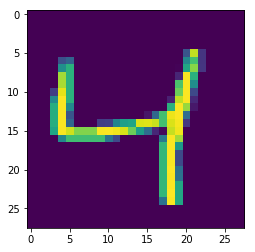

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[2].reshape(28,28))

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Using BatchNormalization, along with kernel regularizers

In [8]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3 )) #24
model.add(BatchNormalization()) 
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1 ) ) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.01) ))#9
model.add(BatchNormalization()) 
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3 ))#7
model.add(BatchNormalization()) 
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3 ))#5
model.add(BatchNormalization()) 
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3 ))#3
model.add(BatchNormalization()) 
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4))
model.add(BatchNormalization()) 
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
__________

In [0]:
model_filename = 'assignment_5_weights.hdf5'

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

mcp_save = ModelCheckpoint(model_filename, save_best_only=True, monitor='val_loss', mode='min', verbose = 1)


model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [10]:
model.fit_generator(datagen.flow( X_train, Y_train, batch_size=128),
                    steps_per_epoch=len( X_train) / 128, epochs=40, verbose=1, 
                    validation_data=datagen.flow( X_test, Y_test), validation_steps= len( X_test) / 128,callbacks=[LearningRateScheduler(scheduler, verbose=1), mcp_save])

Instructions for updating:
Use tf.cast instead.
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
469/468 [==============================] - 12s 25ms/step - loss: 0.6391 - acc: 0.8360 - val_loss: 0.1798 - val_acc: 0.9751

Epoch 00001: val_loss improved from inf to 0.17978, saving model to assignment_5_weights.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
469/468 [==============================] - 8s 18ms/step - loss: 0.3600 - acc: 0.8829 - val_loss: 0.1119 - val_acc: 0.9818

Epoch 00002: val_loss improved from 0.17978 to 0.11187, saving model to assignment_5_weights.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
469/468 [==============================] - 8s 18ms/step - loss: 0.3280 - acc: 0.8869 - val_loss: 0.0704 - val_acc: 0.9893

Epoch 00003: val_loss improved from 0.11187 to 0.07037, saving model to assignment_5_weights.hdf5
Epoch 4/40

Epoch 00004: LearningRateSche

Loading the model weights for best validation score

In [0]:
model.load_weights(model_filename)

In [12]:
score = model.evaluate_generator(datagen.flow(X_test, Y_test), steps= len(X_test)/32)
print(score)

[0.025291484800726176, 0.9945]


Note that while predicting, **shuffle** needs to be turned off, else, we cannot get back indices to match with original test dataset

In [0]:
predictions = model.predict_generator(datagen.flow(X_test, Y_test, shuffle=False), steps= len(X_test)/32)
  
  


In [0]:
def get_wrongly_classified_indices(predictions, y_vals):
  
  """
  Takes predicted and actual values
  Returns a tuple of misclassified image indexes and their corresponding predicted and actual values
  
  NOTE: Make sure your predictions are in the same order of actuals, using shuffle=False while predicting would be important
  
  Params:
  predictions: probability values of predictions
  y_vals: actual values of data
  """
  
  predicted_y = np.argmax(predictions, axis=1)
  
  actual_y = np.argmax(y_vals, axis = 1)
  
  wrong_indices = np.nonzero(~(actual_y == predicted_y))
  
  return (wrong_indices[0], predicted_y[wrong_indices[0]], actual_y[wrong_indices[0]])
  
  
  
  

In [15]:
misclassified_image_idx = get_wrongly_classified_indices(predictions, Y_test)

misclassified_image_idx

(array([ 321,  445,  449,  582,  740,  947,  965, 1014, 1112, 1232, 1242,
        1260, 1681, 1878, 1901, 2018, 2035, 2130, 2135, 2293, 2369, 2447,
        2597, 2654, 2896, 2927, 2939, 3030, 3225, 3422, 3448, 3520, 3726,
        3762, 3767, 3941, 4201, 4284, 4740, 4783, 6558, 6572, 6576, 6597,
        6625, 8339, 8408, 8527, 9009, 9015, 9620, 9638, 9669, 9692, 9729]),
 array([7, 0, 5, 2, 9, 9, 0, 5, 6, 4, 9, 1, 7, 3, 4, 7, 3, 9, 1, 0, 3, 9,
        3, 1, 0, 2, 5, 0, 9, 0, 2, 2, 9, 8, 2, 6, 7, 5, 5, 9, 2, 7, 1, 7,
        2, 5, 2, 9, 2, 2, 7, 7, 7, 7, 6]),
 array([2, 6, 3, 8, 4, 8, 6, 6, 4, 9, 4, 7, 3, 8, 9, 1, 5, 4, 6, 9, 5, 4,
        5, 6, 8, 3, 9, 6, 7, 6, 3, 6, 4, 6, 7, 4, 1, 9, 3, 4, 6, 1, 7, 0,
        8, 8, 8, 4, 7, 7, 9, 9, 4, 9, 5]))

In [0]:
number_of_im = len(misclassified_image_idx[0])

if (number_of_im) > 25:
  number_of_im = 25

figures = {}

for i in range(number_of_im):
  
  title = str(i+1)+'.\tPredicted: '.expandtabs()+str(misclassified_image_idx[1][i]) + '\n\tActual: '.expandtabs() + str(misclassified_image_idx[2][i])
  
  img_idx = misclassified_image_idx[0][i]
  
  image = X_test[img_idx].reshape(28,28)
  
  figures[title] = image
  

In [0]:
def plot_figures(figures, nrows = 1, ncols=1):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15,20))
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(figures[title],)
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    #plt.tight_layout() # optional
    plt.subplots_adjust(hspace = 0.5)
    plt.show()

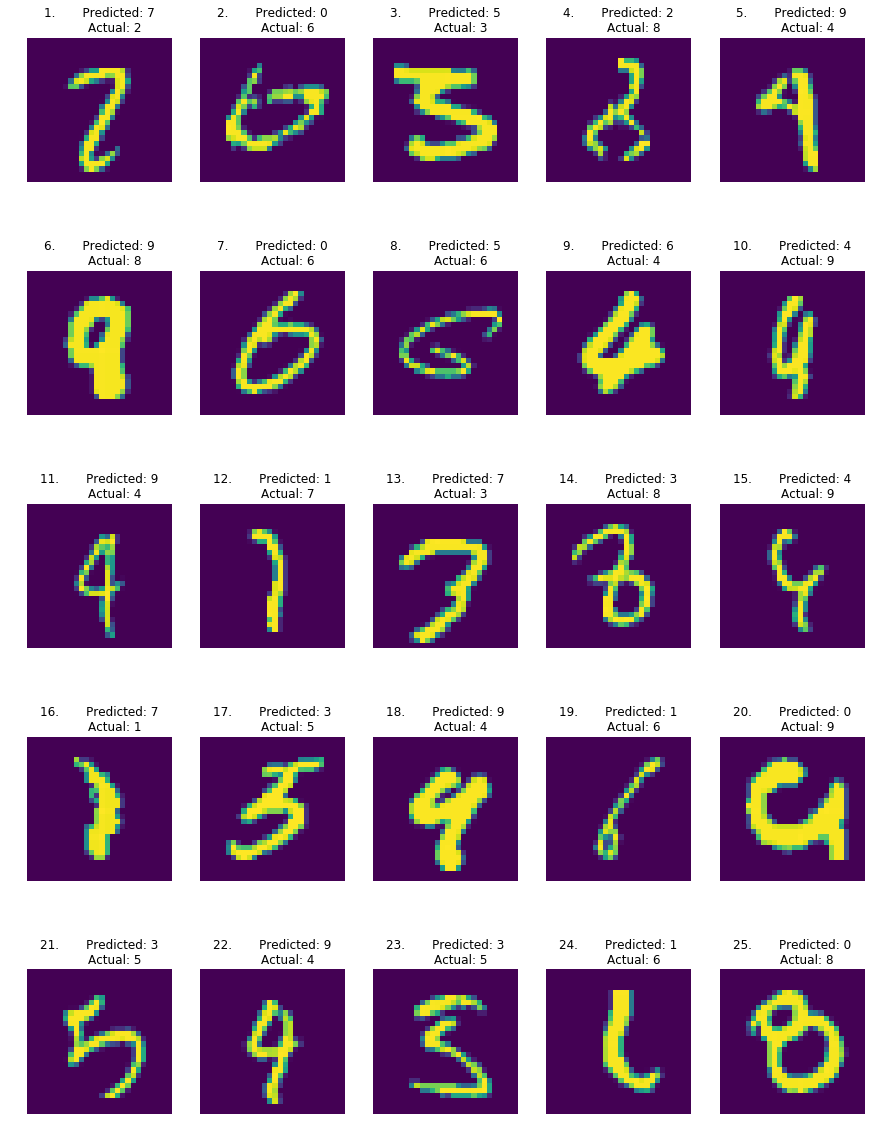

In [29]:
plot_figures(figures, 5, 5)